# PA 3: Association Analysis - Apriori/FP Growth

## Student Details 

**Student Name and ID:**

Arun Sreekanth - 1002024369

**Group members name and ID :-**

Rohith Reddy Basireddy - 1002069511
Maddi Rushi Vardhan Reddy - 1002069581

## Submission Instructions

Rename this submission file as specified in the instructions document

## Tasks

1.    Load the dataset (from the csv file)

In [499]:
# Write your code here

import pandas as pd
ds1= pd.read_csv('dataset1.csv')

ds1.head()


,Tid,items
0,0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,1,"Milk,"
2,2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,4,"Apple, Bread,"


2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [500]:
ds1['items'] = ds1['items'].str.replace('Ice cream', 'Icecream')
ds1['items'] = ds1['items'].str.replace('Kidney Beans', 'KidneyBeans')
ds1.head()





,Tid,items
0,0,"Bread, Corn, Dill, Icecream, Sugar, Yogurt, ch..."
1,1,"Milk,"
2,2,"Apple, Butter, Dill, Icecream, Milk, Yogurt, c..."
3,3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,4,"Apple, Bread,"


In [501]:
# Write your code here

#r=ds1.dropna()  #drops all None and NaN Values in the dataset1

#null_values = ds1.isnull().sum() #Checks the null values present in the dataset
#print(null_values)
#print(r)
ds1['items'] = ds1['items'].str.replace(",", "")
ds1.head()




,Tid,items
0,0,Bread Corn Dill Icecream Sugar Yogurt chocolate
1,1,Milk
2,2,Apple Butter Dill Icecream Milk Yogurt chocolate
3,3,Butter Cheese Dill Milk Nutmeg Onion
4,4,Apple Bread


In [480]:
import numpy as np

ds1.replace("", np.nan, inplace=True)
ds1


,Tid,items
0,0,Bread Corn Dill Icecream Sugar Yogurt chocolate
1,1,Milk
2,2,Apple Butter Dill Icecream Milk Yogurt chocolate
3,3,Butter Cheese Dill Milk Nutmeg Onion
4,4,Apple Bread
...,...,...
994,994,Bread Eggs Unicorn chocolate
995,995,Apple Corn KidneyBeans Milk Nutmeg Yogurt
996,996,Apple Corn Dill Sugar chocolate
997,997,Butter Cheese Corn Eggs Icecream KidneyBeans N...


In [502]:
ds1.drop_duplicates(inplace=True)
ds1


,Tid,items
0,0,Bread Corn Dill Icecream Sugar Yogurt chocolate
1,1,Milk
2,2,Apple Butter Dill Icecream Milk Yogurt chocolate
3,3,Butter Cheese Dill Milk Nutmeg Onion
4,4,Apple Bread
...,...,...
994,994,Bread Eggs Unicorn chocolate
995,995,Apple Corn KidneyBeans Milk Nutmeg Yogurt
996,996,Apple Corn Dill Sugar chocolate
997,997,Butter Cheese Corn Eggs Icecream KidneyBeans N...


In [503]:
# Split items column into list of items
ds1['items'] = ds1['items'].str.split()
ds1



,Tid,items
0,0,"[Bread, Corn, Dill, Icecream, Sugar, Yogurt, c..."
1,1,[Milk]
2,2,"[Apple, Butter, Dill, Icecream, Milk, Yogurt, ..."
3,3,"[Butter, Cheese, Dill, Milk, Nutmeg, Onion]"
4,4,"[Apple, Bread]"
...,...,...
994,994,"[Bread, Eggs, Unicorn, chocolate]"
995,995,"[Apple, Corn, KidneyBeans, Milk, Nutmeg, Yogurt]"
996,996,"[Apple, Corn, Dill, Sugar, chocolate]"
997,997,"[Butter, Cheese, Corn, Eggs, Icecream, KidneyB..."


3.    Encode the dataset

In [504]:
# Write your code here
!pip install mlxtend
import pandas as pd

from mlxtend.preprocessing import TransactionEncoder
ds1['items'] = ds1['items'].apply(lambda x: ' '.join(x))

# convert the dataframe into a list of transactions
transactions = []
for index, row in ds1.iterrows():
    transactions.append(row['items'].split())

# encode the transactions using one-hot encoding
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
encoded_df = pd.DataFrame(te_ary, columns=te.columns_)

# add the Tid column to the encoded dataframe
encoded_df.insert(0, 'Tid', df['Tid'])

# display the encoded dataframe
print(encoded_df.head())


   Tid  Apple  Bread  Butter  Cheese   Corn   Dill   Eggs  Icecream  \
0    0  False   True   False   False   True   True  False      True   
1    1  False  False   False   False  False  False  False     False   
2    2   True  False    True   False  False   True  False      True   
3    3  False  False    True    True  False   True  False     False   
4    4   True   True   False   False  False  False  False     False   

   KidneyBeans   Milk  Nutmeg  Onion  Sugar  Unicorn  Yogurt  chocolate  
0        False  False   False  False   True    False    True       True  
1        False   True   False  False  False    False   False      False  
2        False   True   False  False  False    False    True       True  
3        False   True    True   True  False    False   False      False  
4        False  False   False  False  False    False   False      False  


In [505]:
encoded_df = encoded_df.replace({False: 0, True: 1})


encoded_df

,Tid,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Icecream,KidneyBeans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
997,997,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1


In [506]:
encoded_df_new = encoded_df.drop('Tid', axis=1)
encoded_df_new

,Apple,Bread,Butter,Cheese,Corn,Dill,Eggs,Icecream,KidneyBeans,Milk,Nutmeg,Onion,Sugar,Unicorn,Yogurt,chocolate
0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,1
3,0,0,1,1,0,1,0,0,0,1,1,1,0,0,0,0
4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1
995,1,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0
996,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1
997,0,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1


For each of the combinations in tasks 4 & 5, print the output in the following Sample format:

Support = 0.02
Confidence = 0.1
Total Number of Association Rules: 10
Top 5 rules ordered by Confidence descending:
Number of Maximal Sets: 5
Number of Closed Sets: 5


4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

In [507]:
# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.02

# Confidence threshold
confidence = 0.1



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Apriori algorithm
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)





Support = 0.02
Confidence = 0.1
Total number of association rules: 102985
Top 5 rules ordered by confidence descending:
                                            antecedents    consequents  \
102325              (Nutmeg, Butter, Bread, Milk, Corn)  (KidneyBeans)   
102491  (Bread, chocolate, Sugar, KidneyBeans, Unicorn)       (Yogurt)   
42746                   (Sugar, Unicorn, Nutmeg, Apple)         (Corn)   
102212        (Cheese, Sugar, Apple, KidneyBeans, Corn)      (Unicorn)   
57931                       (Nutmeg, Milk, Bread, Corn)  (KidneyBeans)   

        antecedent support  consequent support   support  confidence  \
102325            0.024024            0.408408  0.021021    0.875000   
102491            0.024024            0.420420  0.020020    0.833333   
42746             0.039039            0.407407  0.031031    0.794872   
102212            0.028028            0.389389  0.022022    0.785714   
57931             0.042042            0.408408  0.033033    0.785714   

  

In [508]:
# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.05

# Confidence threshold
confidence = 0.3



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Apriori algorithm
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)





Support = 0.05
Confidence = 0.3
Total number of association rules: 3083
Top 5 rules ordered by confidence descending:
                     antecedents    consequents  antecedent support  \
2922       (Unicorn, Milk, Dill)    (chocolate)            0.091091   
2725    (Sugar, Unicorn, Cheese)  (KidneyBeans)            0.081081   
2670  (Icecream, Cheese, Yogurt)  (KidneyBeans)            0.087087   
2615        (Cheese, Milk, Dill)    (chocolate)            0.084084   
2037        (Apple, Onion, Corn)        (Sugar)            0.083083   

      consequent support   support  confidence      lift  leverage  \
2922            0.421421  0.062062    0.681319  1.616716  0.023674   
2725            0.408408  0.054054    0.666667  1.632353  0.020940   
2670            0.408408  0.057057    0.655172  1.604209  0.021490   
2615            0.421421  0.055055    0.654762  1.553699  0.019620   
2037            0.409409  0.054054    0.650602  1.589124  0.020039   

      conviction  zhangs_metric  


In [509]:
# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.01

# Confidence threshold
confidence = 0.5



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Apriori algorithm
frequent_itemsets = apriori(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)





Support = 0.01
Confidence = 0.5
Total number of association rules: 39497
Top 5 rules ordered by confidence descending:
                                             antecedents    consequents  \
38319         (Bread, Yogurt, Milk, Corn, Onion, Butter)  (KidneyBeans)   
38223      (Icecream, Bread, Milk, Corn, Yogurt, Butter)  (KidneyBeans)   
38784     (Nutmeg, Butter, Icecream, Corn, Yogurt, Milk)  (KidneyBeans)   
38398  (Nutmeg, Icecream, Bread, chocolate, Sugar, On...       (Butter)   
37635  (Cheese, Nutmeg, chocolate, Sugar, Unicorn, Ap...         (Corn)   

       antecedent support  consequent support   support  confidence      lift  \
38319            0.010010            0.408408  0.010010         1.0  2.448529   
38223            0.013013            0.408408  0.013013         1.0  2.448529   
38784            0.010010            0.408408  0.010010         1.0  2.448529   
38398            0.010010            0.420420  0.010010         1.0  2.378571   
37635            0.010010

5. Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

In [510]:
# Write your code here

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.01

# Confidence threshold
confidence = 0.5



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Fpgrowth algorithm
frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)







Support = 0.01
Confidence = 0.5
Total number of association rules: 39497
Top 5 rules ordered by confidence descending:
                                             antecedents    consequents  \
14058         (Nutmeg, Eggs, Bread, Sugar, Corn, Butter)        (Apple)   
22655       (Nutmeg, Icecream, Eggs, Corn, Onion, Apple)        (Sugar)   
5209   (Nutmeg, Icecream, Bread, chocolate, Sugar, On...       (Butter)   
16749  (Nutmeg, Onion, KidneyBeans, Unicorn, Yogurt, ...    (chocolate)   
6688          (Nutmeg, Bread, Sugar, Corn, Milk, Butter)  (KidneyBeans)   

       antecedent support  consequent support   support  confidence      lift  \
14058            0.010010            0.383383  0.010010         1.0  2.608355   
22655            0.010010            0.409409  0.010010         1.0  2.442543   
5209             0.010010            0.420420  0.010010         1.0  2.378571   
16749            0.010010            0.421421  0.010010         1.0  2.372922   
6688             0.012012

In [511]:
# Write your code here

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.05

# Confidence threshold
confidence = 0.3



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Fpgrowth algorithm
frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)







Support = 0.05
Confidence = 0.3
Total number of association rules: 3083
Top 5 rules ordered by confidence descending:
                     antecedents    consequents  antecedent support  \
2484       (Unicorn, Milk, Dill)    (chocolate)            0.091091   
2408    (Sugar, Unicorn, Cheese)  (KidneyBeans)            0.081081   
1694  (Icecream, Cheese, Yogurt)  (KidneyBeans)            0.087087   
320         (Cheese, Milk, Dill)    (chocolate)            0.084084   
1495        (Apple, Onion, Corn)        (Sugar)            0.083083   

      consequent support   support  confidence      lift  leverage  \
2484            0.421421  0.062062    0.681319  1.616716  0.023674   
2408            0.408408  0.054054    0.666667  1.632353  0.020940   
1694            0.408408  0.057057    0.655172  1.604209  0.021490   
320             0.421421  0.055055    0.654762  1.553699  0.019620   
1495            0.409409  0.054054    0.650602  1.589124  0.020039   

      conviction  zhangs_metric  


In [512]:
# Write your code here

from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


# Convert the item columns to boolean values
encoded_df = encoded_df.astype(bool)

# Support threshold
support = 0.02

# Confidence threshold
confidence = 0.1



# Define the data and parameters for Apriori algorithm
data = encoded_df.drop('Tid', axis=1)
min_support = support
use_colnames = True

# Run the Fpgrowth algorithm
frequent_itemsets = fpgrowth(data, min_support=min_support, use_colnames=use_colnames)

# Define the parameters for association rules generation
metric = "confidence"
min_threshold = confidence

# Generate the association rules
rules = association_rules(frequent_itemsets, metric=metric, min_threshold=min_threshold)


print("Support = {}".format(support))
print("Confidence = {}".format(confidence))

# Print the total number of rules
print("Total number of association rules:", len(rules))



# Set the number of top rules to display
num_top_rules = 5

# Sort rules by confidence in descending order and display the top rules
top_rules = rules.sort_values('confidence', ascending=False).iloc[:num_top_rules]
print(f"Top {num_top_rules} rules ordered by confidence descending:")
print(top_rules)



# Filter rules based on maximum support
maximal_sets = rules[rules['support'] == max(rules['support'])]

# Calculate the number of maximal sets
num_maximal_sets = len(maximal_sets)

# Print the number of maximal sets
print("Number of maximal sets:", num_maximal_sets)



# Filter rules based on minimum support
closed_sets = rules[rules['support'] == min(rules['support'])]

# Calculate the number of closed sets
num_closed_sets = len(closed_sets)

# Print the number of closed sets
print("Number of closed sets:", num_closed_sets)







Support = 0.02
Confidence = 0.1
Total number of association rules: 102985
Top 5 rules ordered by confidence descending:
                                           antecedents    consequents  \
22397              (Nutmeg, Butter, Bread, Milk, Corn)  (KidneyBeans)   
23662  (Bread, chocolate, Sugar, KidneyBeans, Unicorn)       (Yogurt)   
43421                  (Sugar, Unicorn, Nutmeg, Apple)         (Corn)   
48788        (Cheese, Sugar, Apple, KidneyBeans, Corn)      (Unicorn)   
22091                      (Nutmeg, Milk, Bread, Corn)  (KidneyBeans)   

       antecedent support  consequent support   support  confidence      lift  \
22397            0.024024            0.408408  0.021021    0.875000  2.142463   
23662            0.024024            0.420420  0.020020    0.833333  1.982143   
43421            0.039039            0.407407  0.031031    0.794872  1.951049   
48788            0.028028            0.389389  0.022022    0.785714  2.017811   
22091            0.042042           

6. Plot the following graphs comparing both the algorithms:
time vs minimum support
time vs number of itemsets

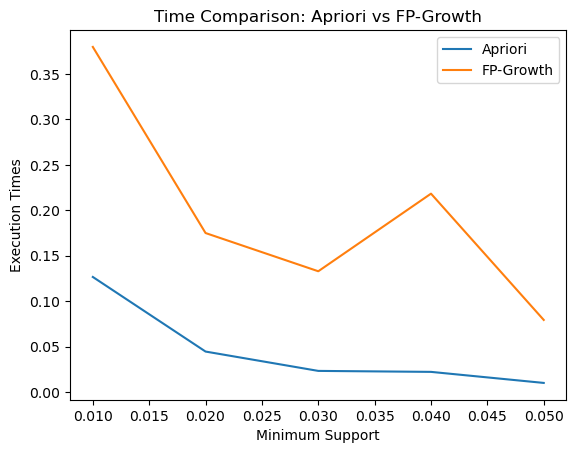

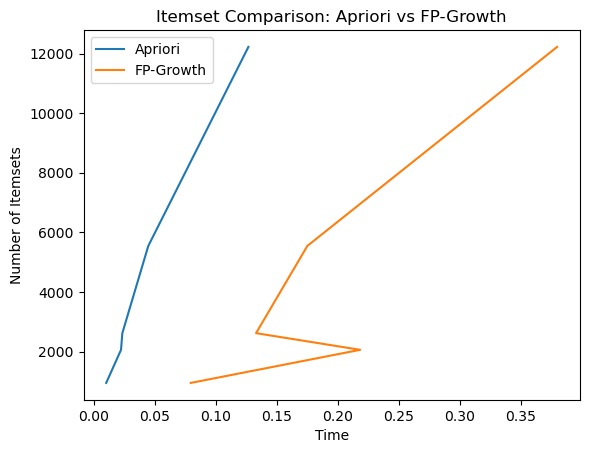

In [513]:
import time
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori, fpgrowth



# define the range of minimum support values to test
support_range = [0.01, 0.02, 0.03, 0.04, 0.05]


# initialize empty lists to store the results
apriori_times = []
fpgrowth_times = []
apriori_itemsets = []
fpgrowth_itemsets = []

# loop through each minimum support value
for support in support_range:
    
    
    # define dataset and minimum support
    dataset = encoded_df.drop('Tid', axis=1)
    min_support = support

    # measure execution time and obtain frequent itemsets
    start_time = time.monotonic()
    frequent_itemsets = apriori(dataset, min_support=min_support)
    elapsed_time = time.monotonic() - start_time

    # store results
    apriori_times.append(elapsed_time)
    apriori_itemsets.append(len(frequent_itemsets))

    # run FP-Growth algorithm and measure the execution time
    start_time = time.time()
    fpgrowth_list = fpgrowth(encoded_df.drop('Tid', axis=1), min_support=support)
    fpgrowth_times.append(time.time() - start_time)
    fpgrowth_itemsets.append(len(fpgrowth_list))

# plot the time vs minimum support graph
plt.plot(support_range, apriori_times, label='Apriori')
plt.plot(support_range, fpgrowth_times, label='FP-Growth')
plt.xlabel('Minimum Support')
plt.ylabel('Execution Times')
plt.title('Time Comparison: Apriori vs FP-Growth')
plt.legend()
plt.show()

# plot the number of itemsets vs minimum support graph
plt.plot(apriori_times, apriori_itemsets, label='Apriori')
plt.plot(fpgrowth_times,fpgrowth_itemsets , label='FP-Growth')
plt.xlabel('Time')
plt.ylabel('Number of Itemsets')
plt.title('Itemset Comparison: Apriori vs FP-Growth')
plt.legend()
plt.show()



7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

Insights:

As seen in the first graph, the FP-Growth method consistently outperforms the Apriori approach for all minimum support levels. This is due to the fact that the FP-Growth method uses a small data structure called a frequent pattern tree FP-Tree to avoid creating candidate itemsets, which lowers the quantity of database searches needed.

From the second graph, it is clear that the FP-Growth method consistently produces fewer itemsets than the Apriori approach does, regardless of the execution duration. This is so that fewer itemsets are formed by the FP-Growth algorithm, which employs a more effective method to build frequent itemsets by employing the FP-tree structure.

Overall, the FP-Growth algorithm appears to be a better choice than the Apriori algorithm for frequent itemset mining, especially when dealing with large datasets or low minimum support values.



Contribution:

Each team member was responsible for working with a different dataset and performing data preprocessing, encoding, and applying the Apriori and FP-Growth algorithms using different combinations of support and confidence.
I have encoded the dataset with Transaction Encoding removing the trailing commas, empty spaces between the strings.

Arun is responsible for working with dataset1, Rohith is responsible for working with dataset2, Rushi with dataset3 where we performed data preprocessing. After that encoded the data using different encoding techniques such as Transaction Encoding, One-hot encoding,MultiLabelBinarizer and applied the Apriori and FP-Growth algorithms for support-confidence combinations  respectively.


After applying the algorithms to their respective datasets, each of us analyzed the results and drew conclusions about the frequent itemsets and association rules found. We also compared the performance of the Apriori and FP-Growth algorithms for each combination of support and confidence.

Resources:

1. https://towardsdatascience.com/data-mining-market-basket-analysis-with-apriori-algorithm-970ff256a92c

2. https://www.geeksforgeeks.org/apriori-algorithm/#

3. https://www.kaggle.com/code/shahules/an-overview-of-encoding-techniques



# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7